In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[300.98, 78.8528, 28.672, 67.04, 281.97, 6.48, 24.816, 7.28, 721.875, 19.44, 199.9, 2479.96, 62.958, 406.368, 897.15, 89.98, 67.84, 150.8, 42.6, 50.94, 119.94, 61.792, 163.96, 23.12, 62.352, 38.16, 166.5, 91.275, 87.92, 36.0, 15.51, 15.51, 11.784, 9.82, 296.85, 258.48, 21.184, 6.672, 239.12, 2518.29, 54.92, 849.95, 526.344, 198.744, 12.96, 13.12, 452.94, 37.94, 539.97, 23.08, 299.52, 11.06, 6.68, 3.0, 11.76, 24.14, 122.71, 23.04, 27.12, 17.43, 110.96, 206.1, 90.99, 10.896, 19.4, 7.992, 89.768, 776.85, 12.222, 21.336, 46.8, 19.68, 1114.272, 18.693, 56.52, 400.032, 79.95, 7.312, 51.75, 104.9, 21.8, 40.2, 30.976, 331.536, 5.352, 437.85, 9.555, 5.28, 22.72, 22.911, 1362.9, 16.688, 376.74, 786.744, 241.92, 108.576, 51.52, 4.312, 39.99, 312.03, 77.56, 1039.728, 95.2, 109.95, 230.28, 27.92, 121.96, 14.9, 32.712, 1115.17, 115.02, 71.088, 979.95, 262.24, 87.84, 93.98, 22.608, 280.782, 22.48, 528.43, 134.85, 90.48, 18.69, 117.96, 1439.968, 43.12, 5.248, 157.9, 319.968, 14.94, 361.764, 364.41, 95

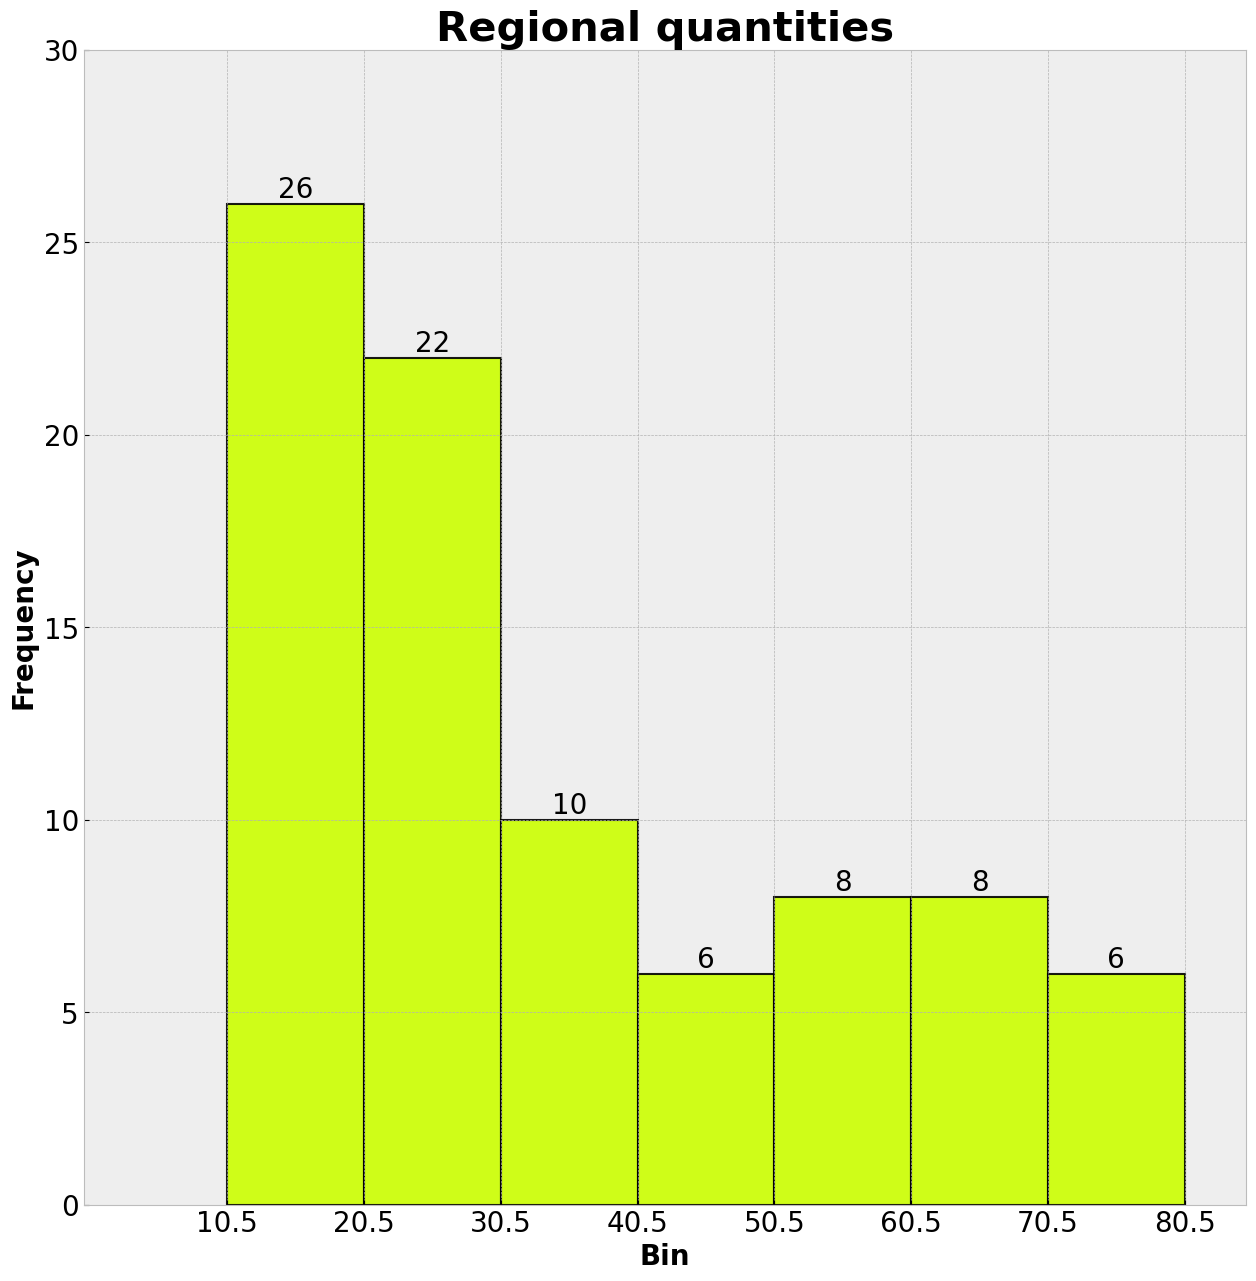

ValueError: Bin labels must be one fewer than the number of bin edges

In [3]:
#Import Relevant Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Read Excel Data
df=pd.read_excel(r'Samples for Python.xlsx', sheet_name='Data Sample', engine='openpyxl')
data_points = df['Sales'].tolist()
print(data_points)

#Creating the Graph
n_bins = 8
fig, ax = plt.subplots()
bins=[10.5,20.5,30.5,40.5,50.5,60.5,70.5,80.5]
arr = ax.hist(data_points, bins,  facecolor="#ccff00", alpha=0.9, edgecolor='k', linewidth=1.5)
print(arr)
labels = [arr[0][i] for i in range(len(arr[0]))]
ax.set_ylim(0, max(labels) + 10)

rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        height + 0.01,
        int(label),
        ha='center',
        va='bottom'
    )
    

plt.rcParams['figure.figsize']=(15,15)
plt.rcParams.update({'font.size': 20})
plt.xticks(bins)
plt.ylim([0,30])
plt.xlim([0,85])
plt.style.use('bmh')
plt.title("Regional quantities",  fontweight='bold',  fontsize=30)
plt.ylim([0,30])
plt.xlabel("Bin", fontweight='bold', fontsize=20)
plt.ylabel("Frequency", fontweight='bold', fontsize=20)
plt.xticks(bins)
plt.show()


#Generating the Table
bins=[0,10.5,20.5,30.5,40.5,50.5,60.5,70.5,80.5]
labels=["Central","East","South","West"]

df['Region']=pd.cut(df['Profit'],bins,labels=labels)
df.head(130)

table=pd.crosstab(index=df['Region'], columns = 'Frequency')
table

table['Cumulative Frequency']=table['Frequency'].cumsum()
table
table.style.set_table_styles([{'selector' : '','props' : [('border','2px solid black')]}])